In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
# Read the data file and convert missing data to NA values
data = pd.read_csv("2315676.txt", delim_whitespace=True, skiprows=[1], na_values=-9999)
data

C:\Users\neljo\AppData\Local\Temp\ipykernel_23988\314448476.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv("2315676.txt", delim_whitespace=True, skiprows=[1], na_values=-9999)


,STATION,STATION_NAME,DATE,TAVG,TMAX,TMIN
0,GHCND:FI000007501,SODANKYLA-AWS-FI,19080101,NaN,2.0,-37.0
1,GHCND:FI000007501,SODANKYLA-AWS-FI,19080102,NaN,6.0,-26.0
2,GHCND:FI000007501,SODANKYLA-AWS-FI,19080103,NaN,7.0,-27.0
3,GHCND:FI000007501,SODANKYLA-AWS-FI,19080104,NaN,-3.0,-27.0
4,GHCND:FI000007501,SODANKYLA-AWS-FI,19080105,NaN,4.0,-36.0
...,...,...,...,...,...,...
41060,GHCND:FI000007501,SODANKYLA-AWS-FI,20201003,47.0,51.0,NaN
41061,GHCND:FI000007501,SODANKYLA-AWS-FI,20201004,43.0,47.0,37.0
41062,GHCND:FI000007501,SODANKYLA-AWS-FI,20201005,42.0,NaN,37.0
41063,GHCND:FI000007501,SODANKYLA-AWS-FI,20201006,45.0,46.0,43.0


In [24]:
# Fill missing values in the TAVG column with the average of TMIN and TMAX
data["TAVG_EST"] = data["TAVG"].fillna((data["TMIN"] + data["TMAX"]) / 2)

# Drop any remaining rows with missing TAVG_EST values
data = data.dropna(subset=['TAVG_EST'])

data.head()

,STATION,STATION_NAME,DATE,TAVG,TMAX,TMIN,TAVG_EST
0,GHCND:FI000007501,SODANKYLA-AWS-FI,19080101,NaN,2.0,-37.0,-17.5
1,GHCND:FI000007501,SODANKYLA-AWS-FI,19080102,NaN,6.0,-26.0,-10.0
2,GHCND:FI000007501,SODANKYLA-AWS-FI,19080103,NaN,7.0,-27.0,-10.0
3,GHCND:FI000007501,SODANKYLA-AWS-FI,19080104,NaN,-3.0,-27.0,-15.0
4,GHCND:FI000007501,SODANKYLA-AWS-FI,19080105,NaN,4.0,-36.0,-16.0


In [25]:
# Define the conversion function
def fahrenheit_to_celsius(fahrenheit):
    return (fahrenheit - 32) * 5.0/9.0

# Apply the conversion function to the TAVG_EST column
data['TAVG_C'] = data['TAVG_EST'].apply(fahrenheit_to_celsius)

C:\Users\neljo\AppData\Local\Temp\ipykernel_23988\128458169.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['TAVG_C'] = data['TAVG_EST'].apply(fahrenheit_to_celsius)


In [26]:
data

,STATION,STATION_NAME,DATE,TAVG,TMAX,TMIN,TAVG_EST,TAVG_C
0,GHCND:FI000007501,SODANKYLA-AWS-FI,19080101,NaN,2.0,-37.0,-17.5,-27.500000
1,GHCND:FI000007501,SODANKYLA-AWS-FI,19080102,NaN,6.0,-26.0,-10.0,-23.333333
2,GHCND:FI000007501,SODANKYLA-AWS-FI,19080103,NaN,7.0,-27.0,-10.0,-23.333333
3,GHCND:FI000007501,SODANKYLA-AWS-FI,19080104,NaN,-3.0,-27.0,-15.0,-26.111111
4,GHCND:FI000007501,SODANKYLA-AWS-FI,19080105,NaN,4.0,-36.0,-16.0,-26.666667
...,...,...,...,...,...,...,...,...
41060,GHCND:FI000007501,SODANKYLA-AWS-FI,20201003,47.0,51.0,NaN,47.0,8.333333
41061,GHCND:FI000007501,SODANKYLA-AWS-FI,20201004,43.0,47.0,37.0,43.0,6.111111
41062,GHCND:FI000007501,SODANKYLA-AWS-FI,20201005,42.0,NaN,37.0,42.0,5.555556
41063,GHCND:FI000007501,SODANKYLA-AWS-FI,20201006,45.0,46.0,43.0,45.0,7.222222


In [18]:
# Define the seasons
seasons = {
    'Winter': [12, 1, 2],
    'Spring': [3, 4, 5],
    'Summer': [6, 7, 8],
    'Autumn': [9, 10, 11]
}

# Parse the dates and set the index
data['DATE'] = pd.to_datetime(data['DATE'], format='%Y%m%d')
data.set_index('DATE', inplace=True)

# Calculate seasonal average temperatures
seasonal_avg_temps = data.groupby([data.index.year, data.index.month]).mean()['TAVG_C'].unstack().T
seasonal_avg_temps = seasonal_avg_temps.groupby(lambda x: [k for k, v in seasons.items() if x in v][0]).mean()

C:\Users\neljo\AppData\Local\Temp\ipykernel_23988\781329159.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['DATE'] = pd.to_datetime(data['DATE'], format='%Y%m%d')


TypeError: agg function failed [how->mean,dtype->object]

In [28]:
# Parse the dates and set the index
data['DATE'] = pd.to_datetime(data['DATE'], format='%Y%m%d')
data.set_index('DATE', inplace=True)

C:\Users\neljo\AppData\Local\Temp\ipykernel_23988\3288775464.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['DATE'] = pd.to_datetime(data['DATE'], format='%Y%m%d')


In [41]:
data

,STATION,STATION_NAME,TAVG,TMAX,TMIN,TAVG_EST,TAVG_C,Year,Month,Season
DATE,,,,,,,,,,
1908-01-01,GHCND:FI000007501,SODANKYLA-AWS-FI,NaN,2.0,-37.0,-17.5,-27.500000,1908,1,Winter
1908-01-02,GHCND:FI000007501,SODANKYLA-AWS-FI,NaN,6.0,-26.0,-10.0,-23.333333,1908,1,Winter
1908-01-03,GHCND:FI000007501,SODANKYLA-AWS-FI,NaN,7.0,-27.0,-10.0,-23.333333,1908,1,Winter
1908-01-04,GHCND:FI000007501,SODANKYLA-AWS-FI,NaN,-3.0,-27.0,-15.0,-26.111111,1908,1,Winter
1908-01-05,GHCND:FI000007501,SODANKYLA-AWS-FI,NaN,4.0,-36.0,-16.0,-26.666667,1908,1,Winter
...,...,...,...,...,...,...,...,...,...,...
2020-10-03,GHCND:FI000007501,SODANKYLA-AWS-FI,47.0,51.0,NaN,47.0,8.333333,2020,10,Autumn
2020-10-04,GHCND:FI000007501,SODANKYLA-AWS-FI,43.0,47.0,37.0,43.0,6.111111,2020,10,Autumn
2020-10-05,GHCND:FI000007501,SODANKYLA-AWS-FI,42.0,NaN,37.0,42.0,5.555556,2020,10,Autumn


In [42]:
# Define the seasons
seasons = {
    'Winter': [12, 1, 2],
    'Spring': [3, 4, 5],
    'Summer': [6, 7, 8],
    'Autumn': [9, 10, 11]
}

In [58]:
# Calculate seasonal average temperatures
data['Year'] = data.index.year
data['Month'] = data.index.month
data['Season'] = data['Month'].apply(lambda x: [k for k, v in seasons.items() if x in v][0])

seasonal_avg_temps = data.groupby(['Year', 'Season'])['TAVG_C'].mean().unstack()

C:\Users\neljo\AppData\Local\Temp\ipykernel_23988\2158473054.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Year'] = data.index.year
C:\Users\neljo\AppData\Local\Temp\ipykernel_23988\2158473054.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Month'] = data.index.month
C:\Users\neljo\AppData\Local\Temp\ipykernel_23988\2158473054.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

In [59]:
seasonal_avg_temps.head()

Season,Autumn,Spring,Summer,Winter
Year,,,,
1908,-1.859217,-2.346743,11.425926,-12.330779
1909,-0.155827,-5.487654,11.814614,-11.580933
1910,-1.742063,-0.122549,10.126812,-9.471767
1911,-1.279150,-2.122347,11.291209,-11.719409
1912,-2.073413,-4.030797,11.095849,-18.745098


In [60]:
# Filter data for the reference period
reference_period = data.loc['1951-01-01':'1980-12-31']
reference_period

,STATION,STATION_NAME,TAVG,TMAX,TMIN,TAVG_EST,TAVG_C,Year,Month,Season
DATE,,,,,,,,,,
1951-01-01,GHCND:FI000007501,SODANKYLA-AWS-FI,NaN,-3.0,-24.0,-13.5,-25.277778,1951,1,Winter
1951-01-02,GHCND:FI000007501,SODANKYLA-AWS-FI,NaN,-14.0,-27.0,-20.5,-29.166667,1951,1,Winter
1951-01-03,GHCND:FI000007501,SODANKYLA-AWS-FI,NaN,5.0,-18.0,-6.5,-21.388889,1951,1,Winter
1951-01-04,GHCND:FI000007501,SODANKYLA-AWS-FI,NaN,8.0,-1.0,3.5,-15.833333,1951,1,Winter
1951-01-05,GHCND:FI000007501,SODANKYLA-AWS-FI,NaN,14.0,7.0,10.5,-11.944444,1951,1,Winter
...,...,...,...,...,...,...,...,...,...,...
1980-12-27,GHCND:FI000007501,SODANKYLA-AWS-FI,-28.0,-28.0,-28.0,-28.0,-33.333333,1980,12,Winter
1980-12-28,GHCND:FI000007501,SODANKYLA-AWS-FI,7.0,20.0,-31.0,7.0,-13.888889,1980,12,Winter
1980-12-29,GHCND:FI000007501,SODANKYLA-AWS-FI,21.0,24.0,20.0,21.0,-6.111111,1980,12,Winter


In [61]:
# Calculate seasonal average temperatures for the reference period
reference_seasonal_avg_temps = reference_period.groupby(['Season'])['TAVG_C'].mean()

In [63]:
print(reference_seasonal_avg_temps)

Season
Autumn    -0.814910
Spring    -2.338307
Summer    12.400262
Winter   -13.552540
Name: TAVG_C, dtype: float64


In [64]:
anomalies = seasonal_avg_temps.sub(reference_seasonal_avg_temps, axis=1)

In [65]:
anomalies

Season,Autumn,Spring,Summer,Winter
Year,,,,
1908,-1.044307,-0.008436,-0.974336,1.221761
1909,0.659083,-3.149347,-0.585648,1.971607
1910,-0.927154,2.215758,-2.273450,4.080773
1911,-0.464240,0.215960,-1.109053,1.833131
1912,-1.258503,-1.692490,-1.304413,-5.192558
...,...,...,...,...
2016,2.170221,4.367292,1.253120,2.362064
2017,1.510881,0.520674,0.015197,3.441429
2018,3.177694,2.338307,2.527275,1.996984


In [66]:
anomalies = seasonal_avg_temps - reference_seasonal_avg_temps

In [67]:
anomalies

Season,Autumn,Spring,Summer,Winter
Year,,,,
1908,-1.044307,-0.008436,-0.974336,1.221761
1909,0.659083,-3.149347,-0.585648,1.971607
1910,-0.927154,2.215758,-2.273450,4.080773
1911,-0.464240,0.215960,-1.109053,1.833131
1912,-1.258503,-1.692490,-1.304413,-5.192558
...,...,...,...,...
2016,2.170221,4.367292,1.253120,2.362064
2017,1.510881,0.520674,0.015197,3.441429
2018,3.177694,2.338307,2.527275,1.996984


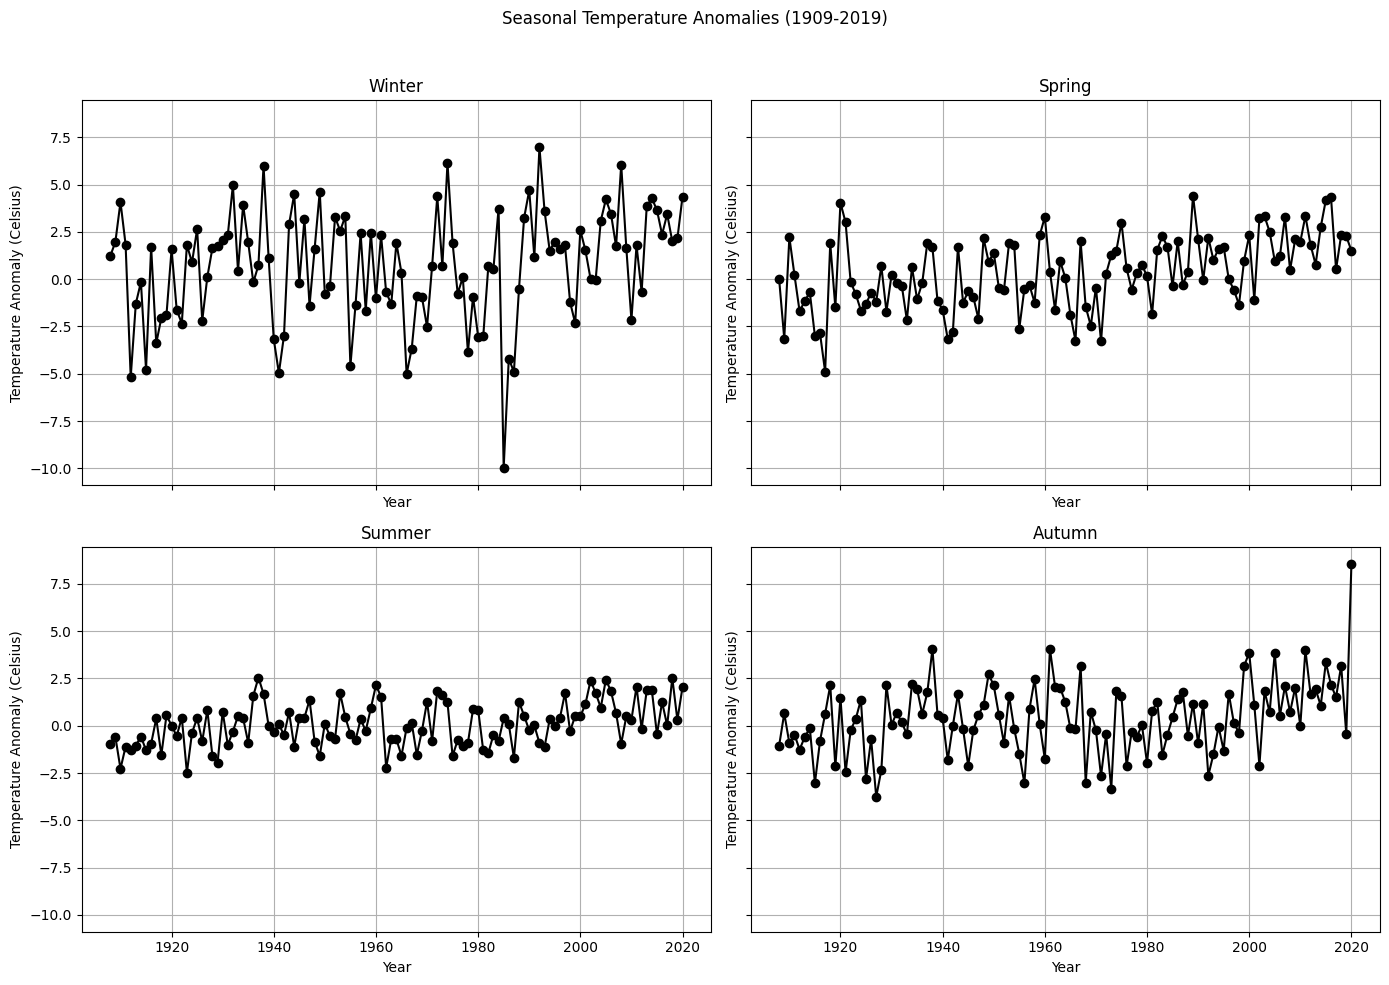

In [82]:
# Set up the figure and axes for the four-panel plot
fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharex=True, sharey=True)
fig.suptitle('Seasonal Temperature Anomalies (1909-2019)')

# Plot each season's anomalies
seasons_list = ['Winter', 'Spring', 'Summer', 'Autumn']
for i, season in enumerate(seasons_list):
    ax = axes[i//2, i%2]
    ax.plot(anomalies.index, anomalies[season], label=season, color='black', marker='o')
    ax.set_title(season)
    ax.set_xlabel('Year')
    ax.set_ylabel('Temperature Anomaly (Celsius)')
    ax.grid(True)

# Adjust layout and save the figure
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('seasonal_temp_anomalies.png')

# Show the plot
plt.show()

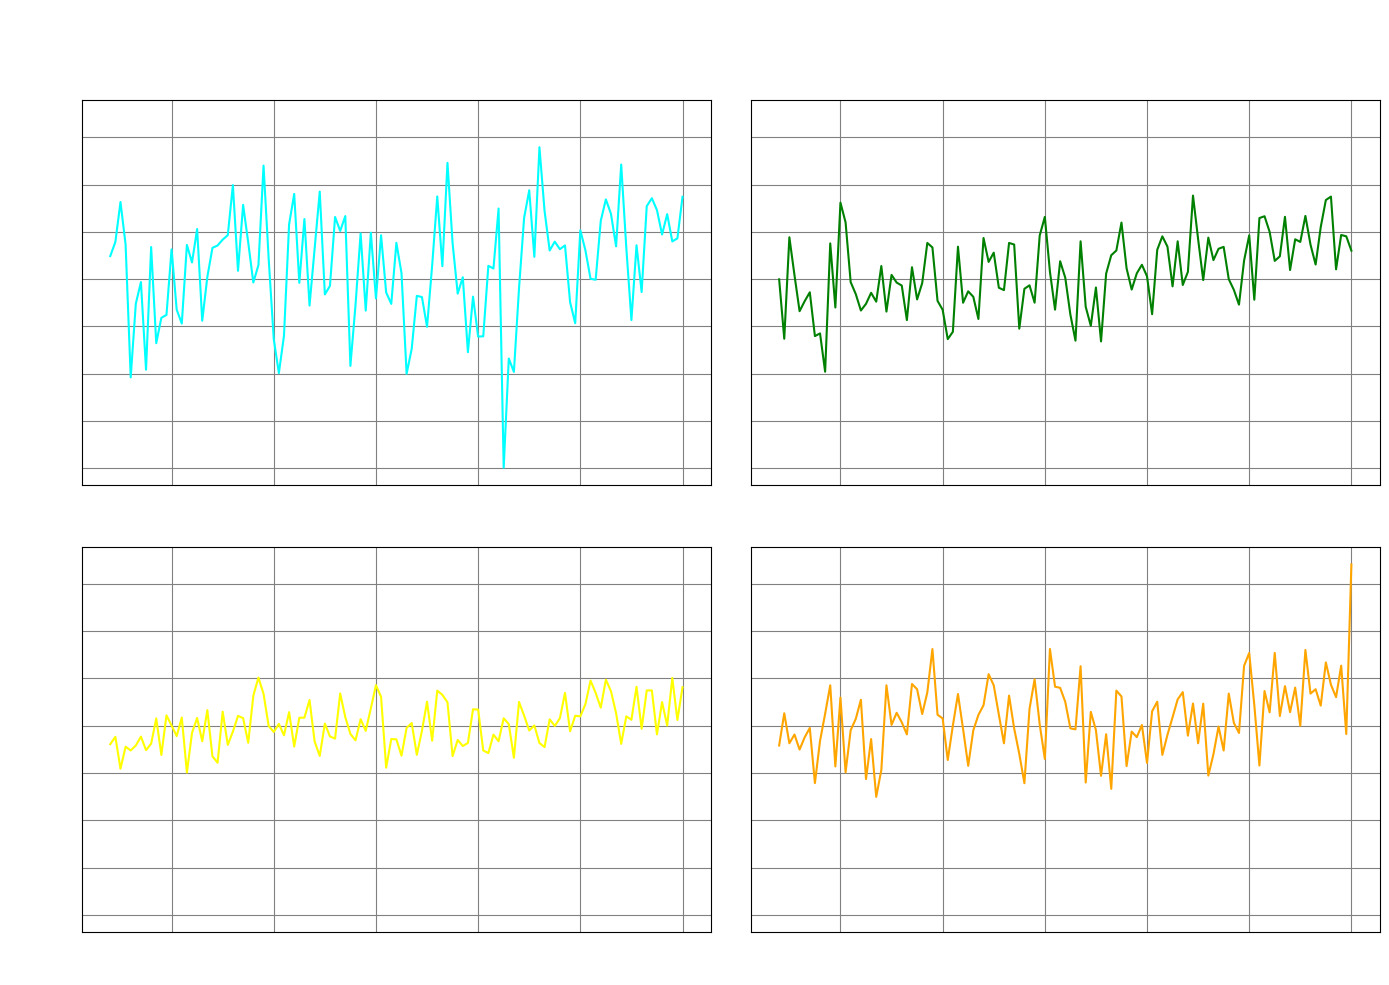

In [83]:
# Step 7: Plot the data
fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharex=True, sharey=True)
fig.suptitle('Seasonal Temperature Anomalies (1909-2019)', color='white')

# Set the dark background
plt.style.use('dark_background')

# Define colors for each season
season_colors = {
    'Winter': 'cyan',
    'Spring': 'green',
    'Summer': 'yellow',
    'Autumn': 'orange'
}

# Plot each season's anomalies
seasons_list = ['Winter', 'Spring', 'Summer', 'Autumn']
for i, season in enumerate(seasons_list):
    ax = axes[i//2, i%2]
    ax.plot(anomalies.index, anomalies[season], label=season, color=season_colors[season])
    ax.set_title(season, color='white')
    ax.set_xlabel('Year', color='white')
    ax.set_ylabel('Temperature Anomaly (Celsius)', color='white')
    ax.grid(True, color='gray')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')

# Adjust layout and save the figure
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('seasonal_temp_anomalies.png')

# Show the plot
plt.show()